# Test Specs

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import gs_analysis as ga

from scipy.signal import find_peaks, peak_prominences

# ATR Sample Spec

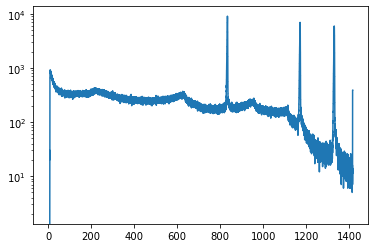

In [3]:
path = "test_data/atr_sample_1.Spe"  
spec = ga.get_spect(path)
spec.ebins = ga.generate_ebins(spec)
ga.plot_spec(spec.counts, erg=spec.ebins)

In [5]:
#peak finding
smoothed_counts, peaks = ga.peak_finder(spec.counts, 100, 10)
print(peaks)


#counts
peak_index, counts = ga.peak_counts(peaks, 0, smoothed_counts, spec.ebins)
print('peak at index', peak_index, ', net counts =', counts)

[ 9646 13555 15395]
peak at index 9646 , net counts = 77777.00823045264


In [8]:
#trying to iterate for all peaks
c_arr = ([])
for i in range(len(peaks)):
    peak_index, counts = ga.peak_counts(peaks, i, smoothed_counts, spec.ebins)
    c_arr = np.append(c_arr, counts)
    print('peak at index', peak_index, ', net counts =', counts)
    
#ebins vals and their corresponding counts
print('peak ebins', spec.ebins[peaks])
print('peak counts', c_arr)


peak at index 9646 , net counts = 77777.00823045264
peak at index 13555 , net counts = 56148.43209876543
peak at index 15395 , net counts = 47968.427983539106
peak ebins [ 833.853241 1171.669021 1330.681821]
peak counts [77777.00823045 56148.43209877 47968.42798354]


In [9]:
real_time = spec.real_time
print(real_time)

370.0
